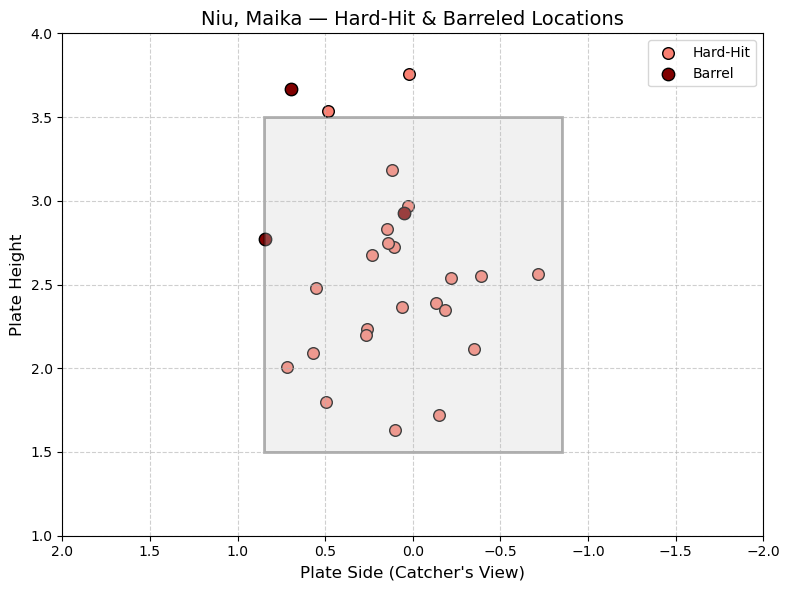

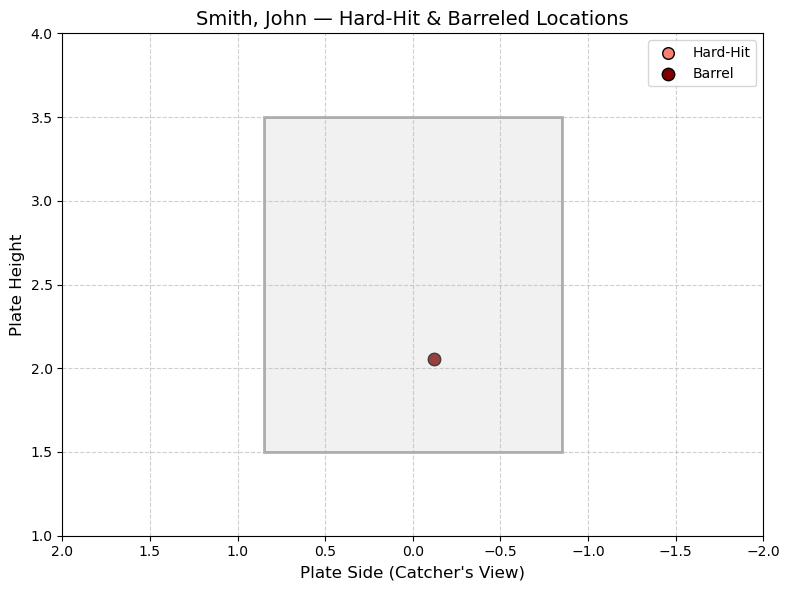

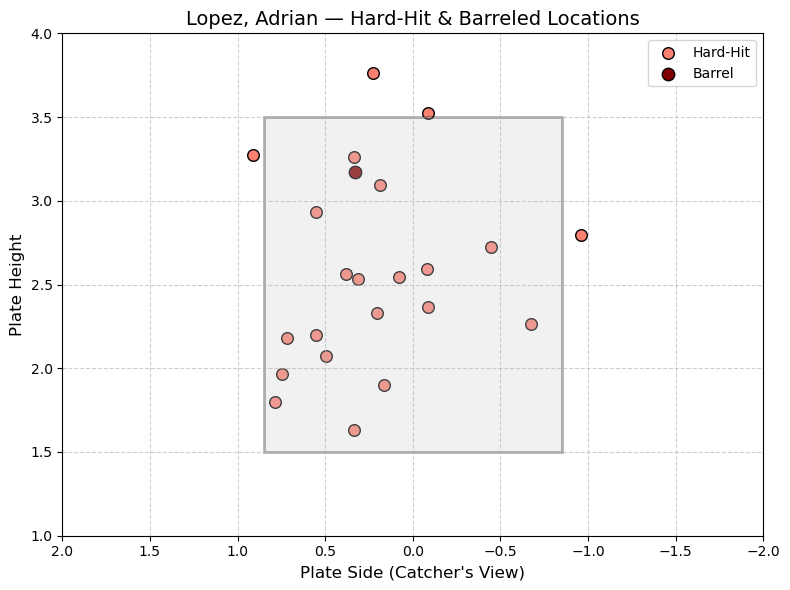

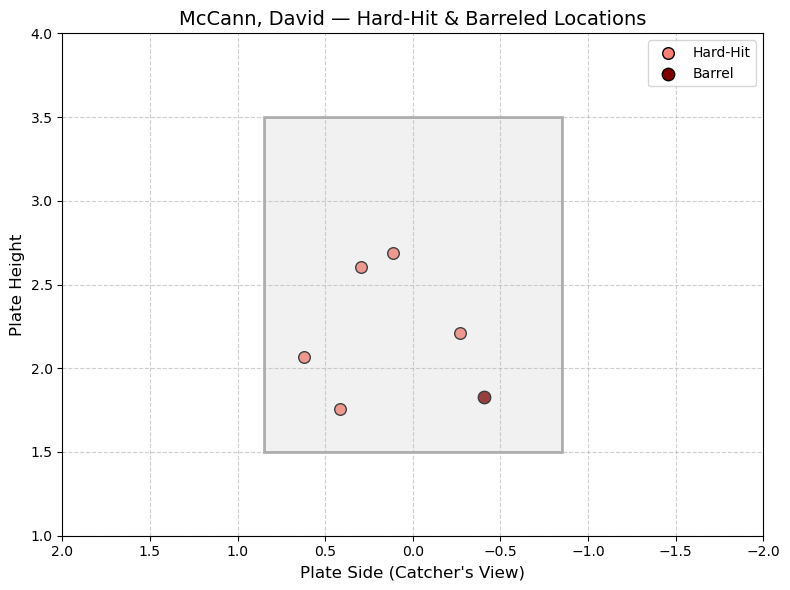

No hard-hit balls found for Mizell, Coleman.


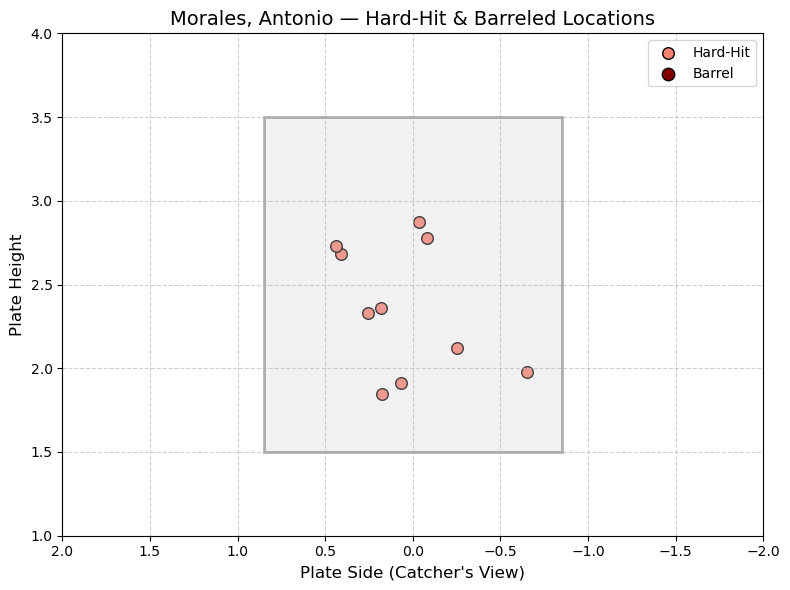

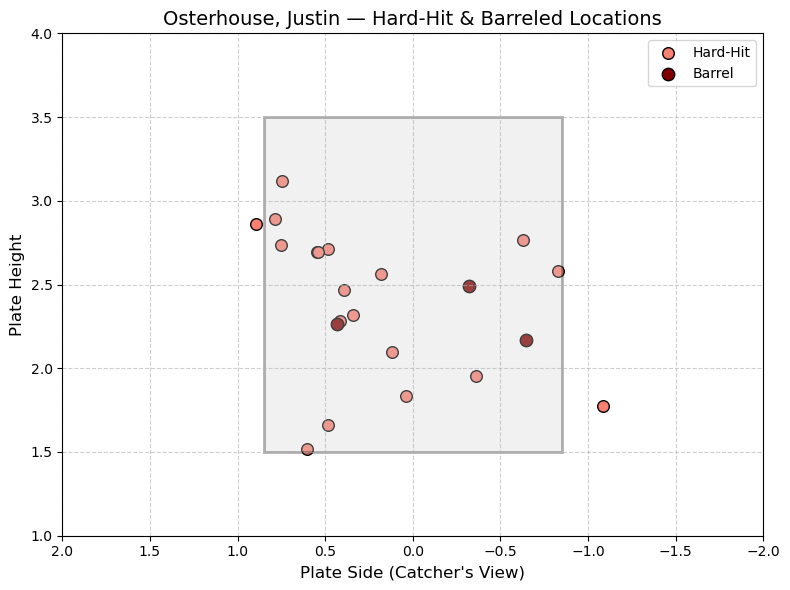

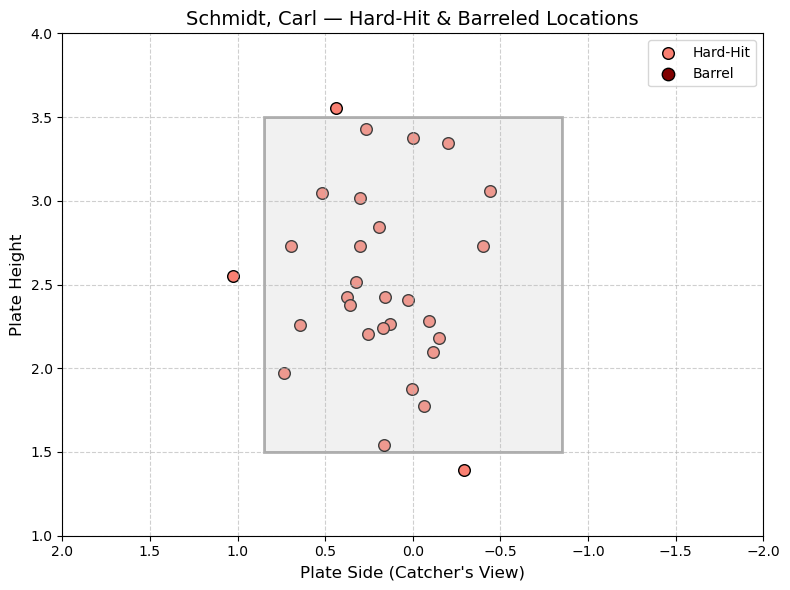

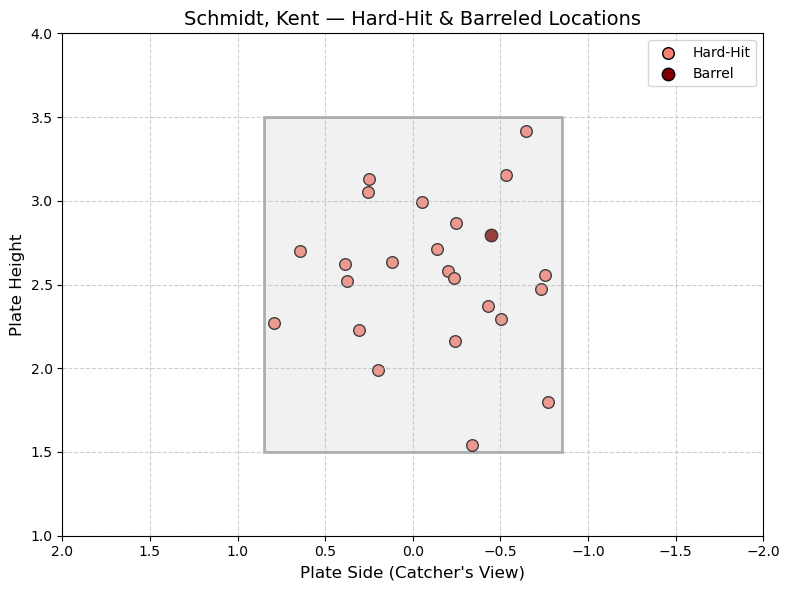

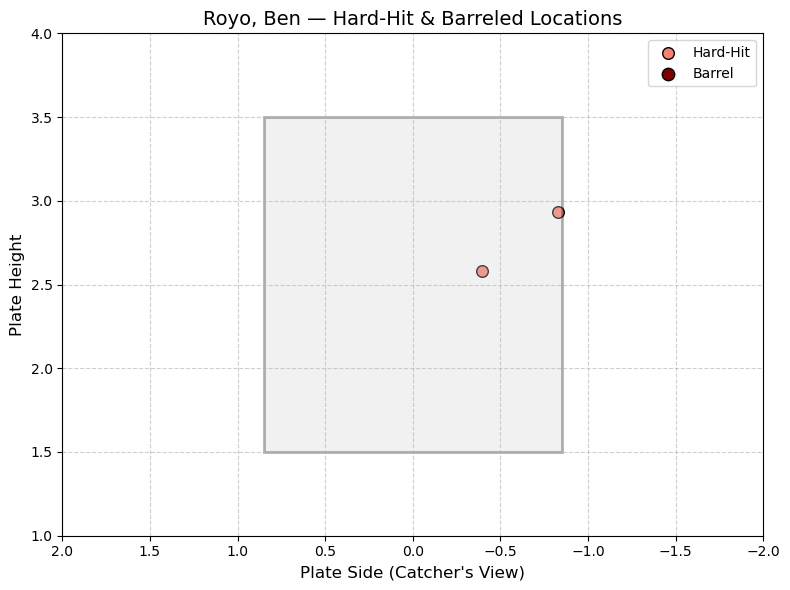

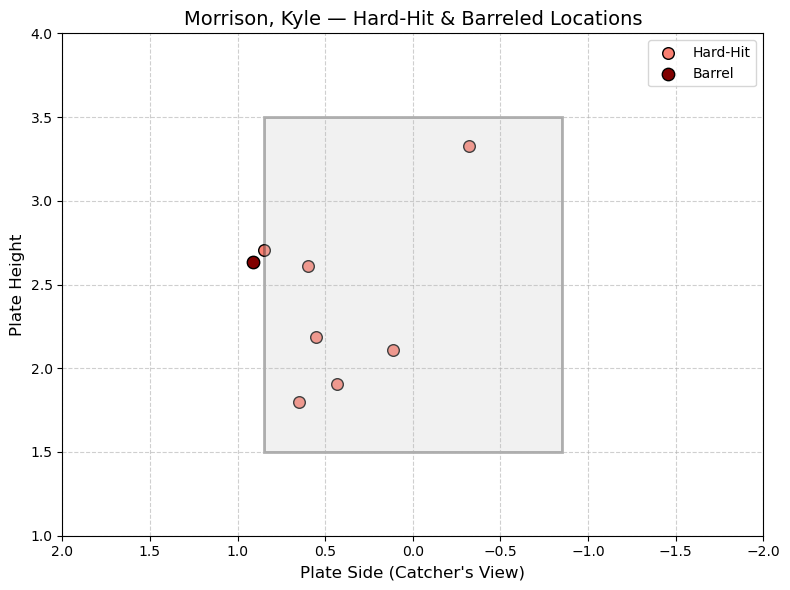

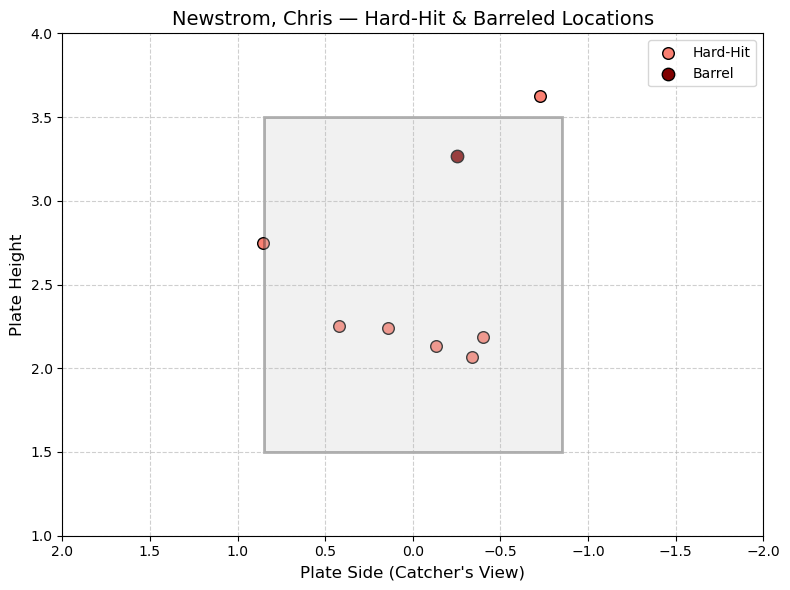

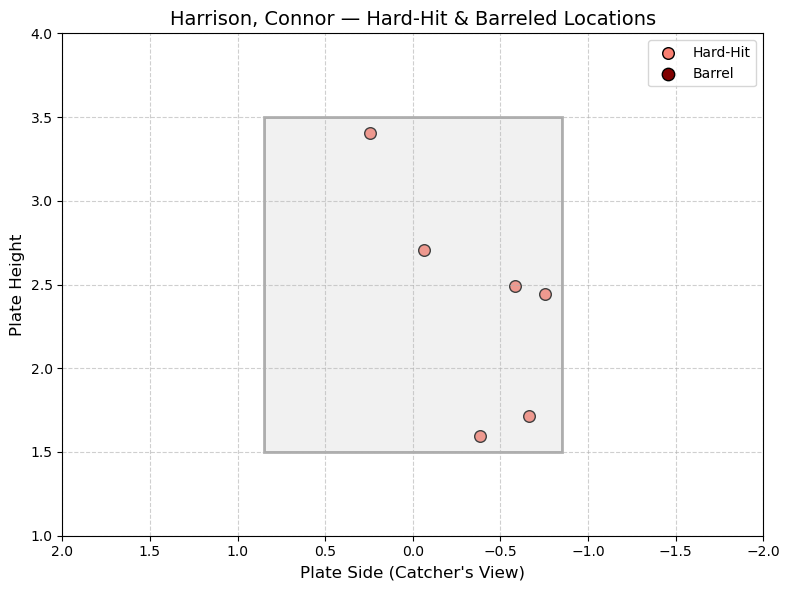

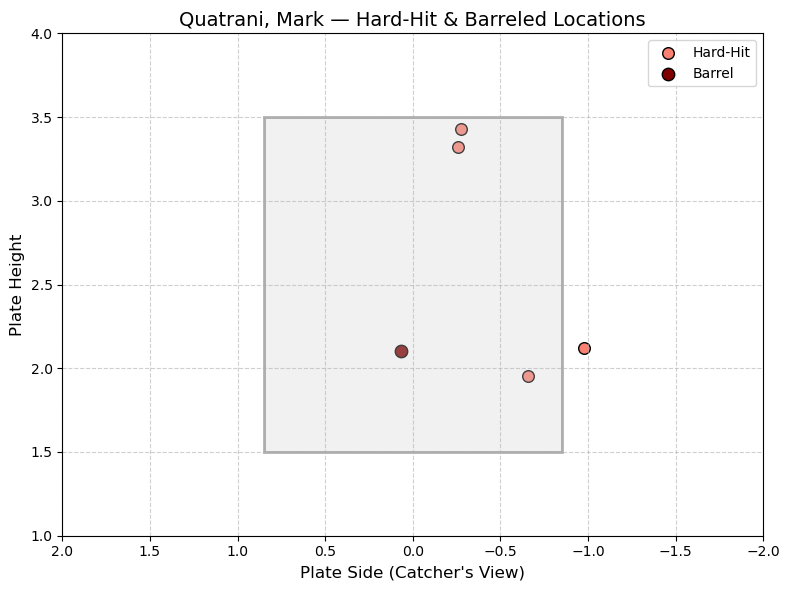

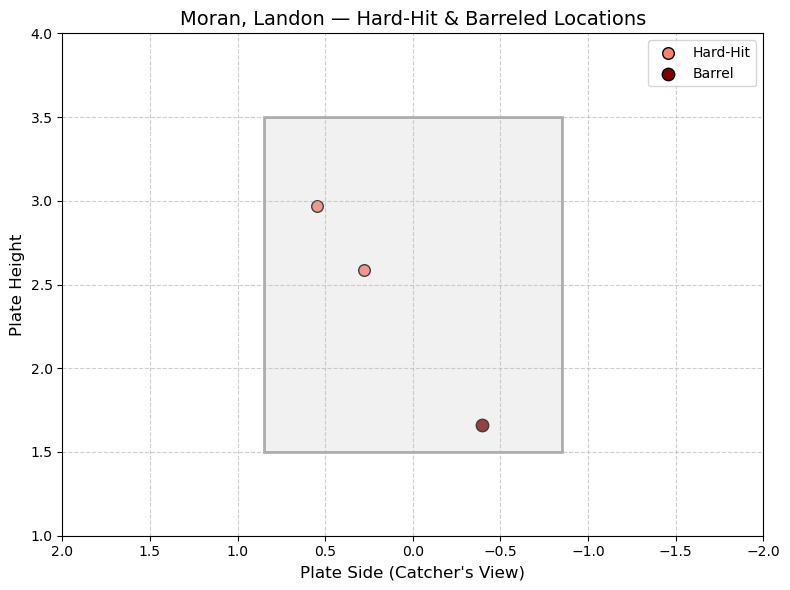

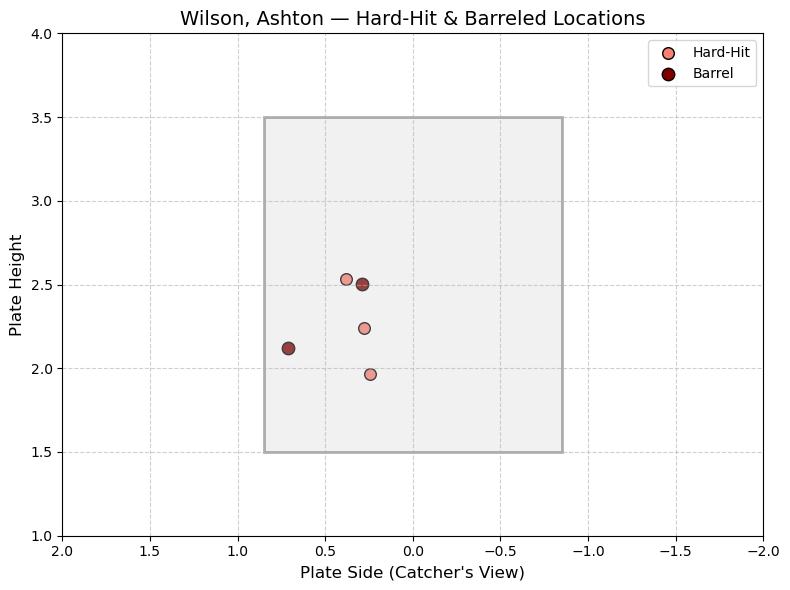

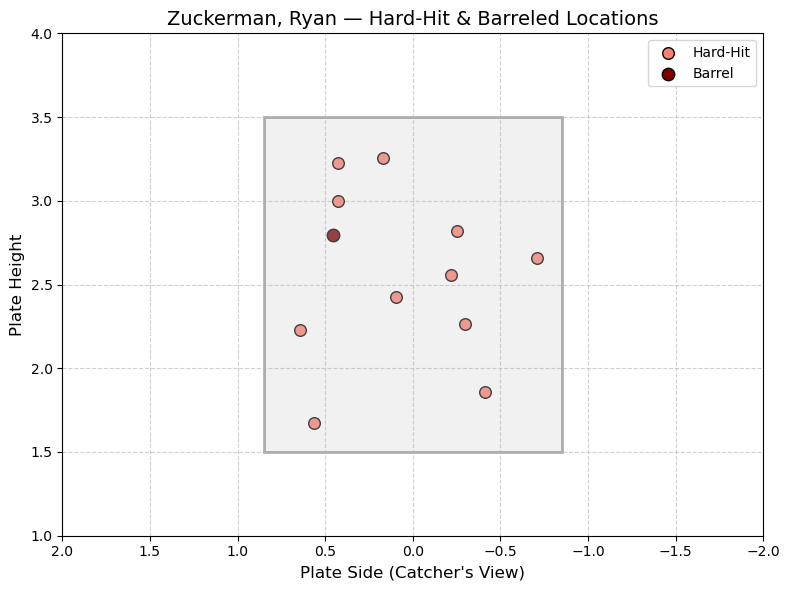

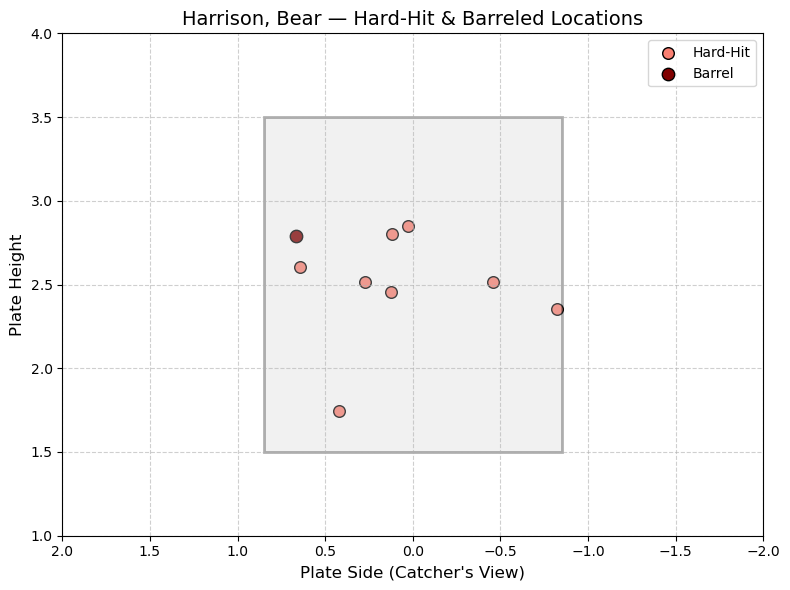

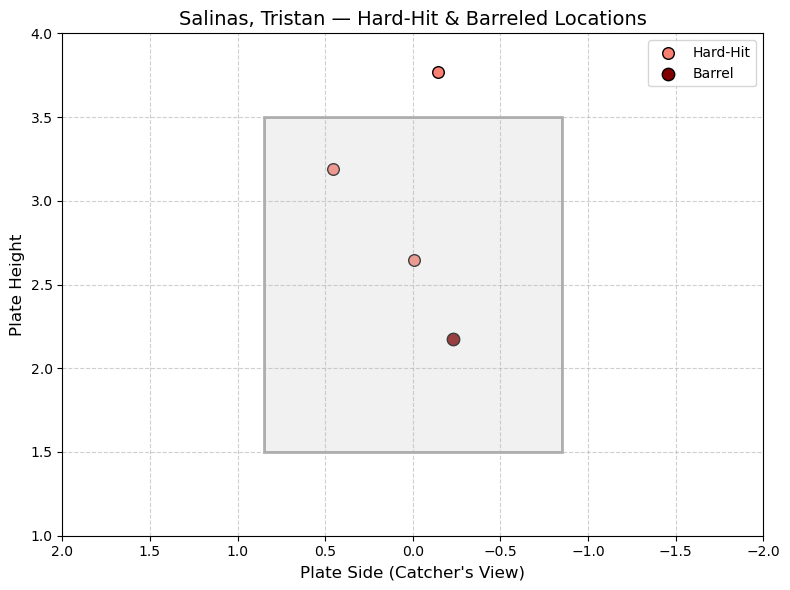

No hard-hit balls found for Moroney, Reece.
No hard-hit balls found for Yamin, Edward.
No hard-hit balls found for Woodman, Byron.


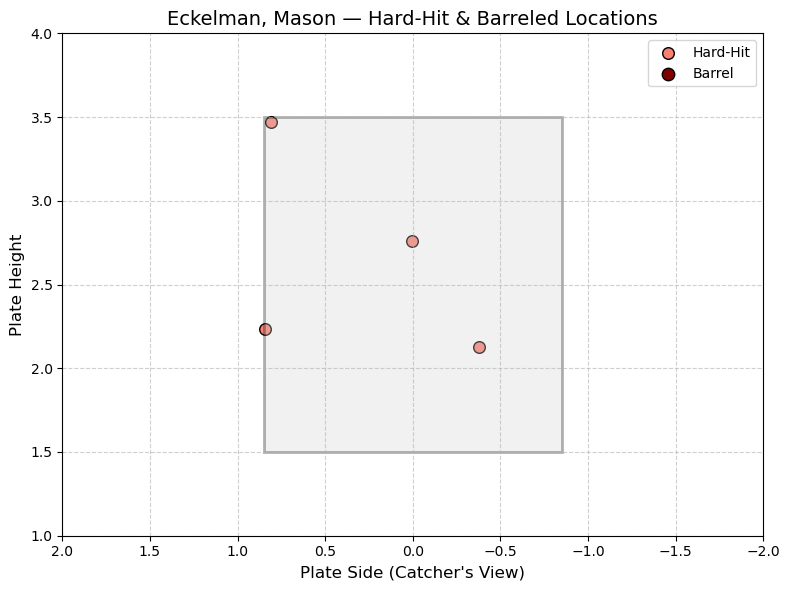

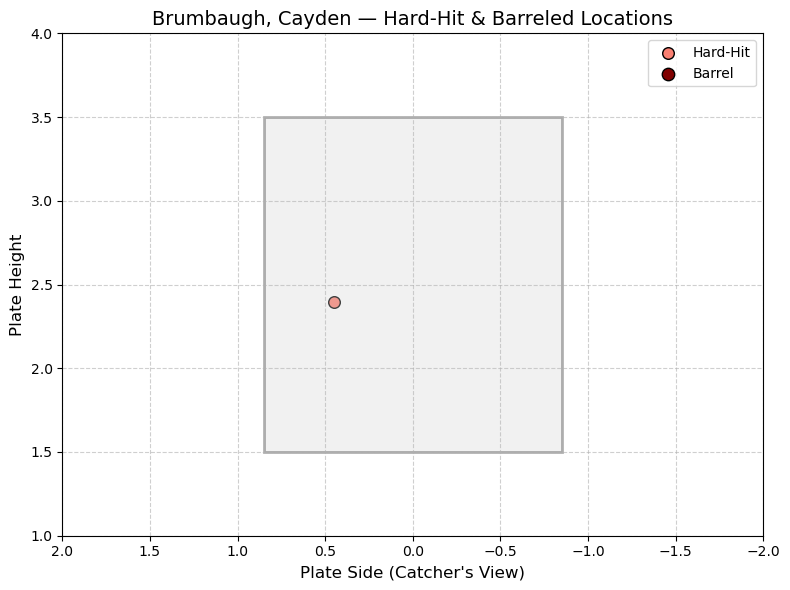

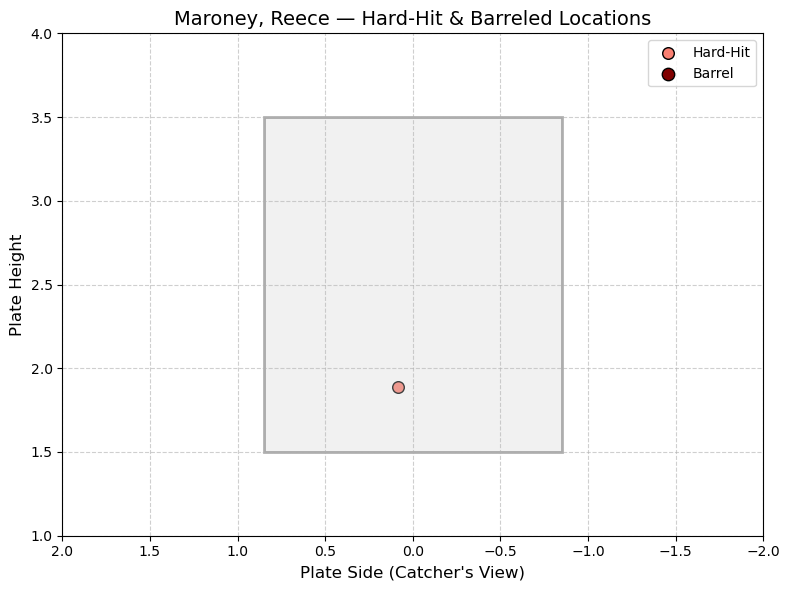

No hard-hit balls found for Greger, Gavin.
No hard-hit balls found for Gregor, Gavin.
No hard-hit balls found for Quigley, Jack.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

file_path = r"C:\Users\brend\OneDrive - Stonehill College\All Cape League Trackman.xlsx"

df = pd.read_excel(file_path)

for col in ['ExitSpeed', 'Angle', 'PlateLocHeight', 'PlateLocSide']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df[df['BatterTeam'] == 'FAL_COM']

unique_batters = df['Batter'].dropna().unique()

for batter in unique_batters:
    batter_df = df[df['Batter'] == batter]

    hard_hit_df = batter_df[(batter_df['ExitSpeed'] >= 93.5)].dropna(subset=['PlateLocHeight', 'PlateLocSide'])

    barreled_df = batter_df[batter_df['ExitSpeed'] >= 96].copy()
    
    barreled_df['lower_angle'] = 26 - (barreled_df['ExitSpeed'] - 96)
    barreled_df['upper_angle'] = 30 + (barreled_df['ExitSpeed'] - 96)
    
    barreled_df = barreled_df[
        (barreled_df['Angle'] >= barreled_df['lower_angle']) &
        (barreled_df['Angle'] <= barreled_df['upper_angle'])
    ].dropna(subset=['PlateLocHeight', 'PlateLocSide'])

    if len(hard_hit_df) > 0:
        fig, ax = plt.subplots(figsize=(8, 6))

        ax.scatter(
            hard_hit_df['PlateLocSide'],
            hard_hit_df['PlateLocHeight'],
            color='salmon',
            edgecolor='black',
            s=70,
            label='Hard-Hit'
        )

        ax.scatter(
            barreled_df['PlateLocSide'],
            barreled_df['PlateLocHeight'],
            color='#800000',
            edgecolor='black',
            s=80,
            label='Barrel'
        )

        zone_bottom = 1.5
        zone_top = 3.5
        zone_half_width = 0.85
        strike_zone = patches.Rectangle(
            (-zone_half_width, zone_bottom),
            zone_half_width * 2,
            zone_top - zone_bottom,
            linewidth=2,
            edgecolor='black',
            facecolor='lightgrey',
            alpha=0.3
        )
        ax.add_patch(strike_zone)

        ax.set_xlim(2, -2)
        ax.set_ylim(1.0, 4.0)
        ax.set_title(f'{batter} — Hard-Hit & Barreled Locations', fontsize=14)
        ax.set_xlabel('Plate Side (Catcher\'s View)', fontsize=12)
        ax.set_ylabel('Plate Height', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(loc='upper right')

        plt.tight_layout()
        plt.show()
    else:
        print(f"No hard-hit balls found for {batter}.")